In [1]:
import pandas as pd  # pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Adatbázis séma (Diagram)

<img src="table_diagram.png">

# Adattáblák

## events

In [2]:
events = pd.read_csv("events.csv", sep=",")

In [3]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [4]:
events.count()

event_id     3252950
device_id    3252950
timestamp    3252950
longitude    3252950
latitude     3252950
dtype: int64

## gender_age_train

In [5]:
gender_age_train = pd.read_csv("gender_age_train.csv", sep=",")

In [6]:
gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [7]:
gender_age_train.count()

device_id    74645
gender       74645
age          74645
group        74645
dtype: int64

In [8]:
gender_age_train.groupby('group')['device_id'].count()

group
F23-      5050
F24-26    4190
F27-28    3118
F29-32    4628
F33-42    5561
F43+      4194
M22-      7488
M23-26    9605
M27-28    5445
M29-31    7309
M32-38    9476
M39+      8581
Name: device_id, dtype: int64

In [9]:
gender_age_train.groupby('gender')['device_id'].count()

gender
F    26741
M    47904
Name: device_id, dtype: int64

## phone_brand_device_model

In [10]:
phone_brand_device_model = pd.read_csv("phone_brand_device_model.csv", sep=",")

In [11]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [12]:
# a kínai márkákat lefordítjuk...

In [13]:
translate = pd.read_csv("translate.csv", sep=",")

In [14]:
translate.head()

,phone_brand,phone_brand_eng
0,三星,samsung
1,天语,Ktouch
2,海信,hisense
3,联想,lenovo
4,欧比,obi


In [15]:
phone_brand_device_model= phone_brand_device_model.merge(translate,on='phone_brand',how='right')

In [16]:
phone_brand_device_model.head()

,device_id,phone_brand,device_model,phone_brand_eng
0,-8890648629457979026,小米,红米,Xiaomi
1,1277779817574759137,小米,MI 2,Xiaomi
2,-3883532755183027260,小米,MI 2S,Xiaomi
3,-5827952925479472594,小米,MI One Plus,Xiaomi
4,-5776341595519925628,小米,MI 2A,Xiaomi


## app_events

In [17]:
app_events = pd.read_csv("app_events.csv", sep=",")

In [18]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [19]:
app_events.count()

event_id        32473067
app_id          32473067
is_installed    32473067
is_active       32473067
dtype: int64

In [20]:
app_events.groupby('event_id')['app_id'].agg('count').count()

1488096

In [21]:
# osszesen 1488096 db esemény van, ahhoz van 32473067 alkalmazás esemény 

## app_labels

In [22]:
app_labels = pd.read_csv("app_labels.csv", sep=",")

In [23]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [24]:
app_labels.count()

app_id      459943
label_id    459943
dtype: int64

## label_categories

In [25]:
label_categories = pd.read_csv("label_categories.csv", sep=",")

In [26]:
label_categories.head()

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [27]:
label_categories.count()

label_id    930
category    927
dtype: int64

In [28]:
# itt van 3 sor NaN. Igazából szerintem nem számít.

# Adatok előkészítése

Szerintem feladatok:
    - a gender_age_train össze kellene join-olni a phone_brand_device_modellel
    - ugyancsak a gender_age_train-t össze kell join-olni az events-app_events-app_labels -en keresztül a label_categories-vel
    - a label kategória dummy változó lenne. A problémám, hogy itt akkro  930 db lenne...
    - bemenő változók: márka, alkalmazás label dummy. Célváltozó: group


In [29]:
# Egyes label-ek gyakorisága

In [30]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [31]:
events.count()

event_id     3252950
device_id    3252950
timestamp    3252950
longitude    3252950
latitude     3252950
dtype: int64

In [32]:
df = events.merge(app_events, on="event_id", how="inner")

In [33]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active
0,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-5720078949152207372,1,0
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-1633887856876571208,1,0
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-653184325010919369,1,1
4,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,8693964245073640147,1,1


In [34]:
#df.drop(columns=["event_id", "device_id", "timestamp", "longitude", "latitude", "is_installed", "is_active"], axis = 1, inplace=True)

In [35]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active
0,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-5720078949152207372,1,0
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-1633887856876571208,1,0
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,-653184325010919369,1,1
4,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,8693964245073640147,1,1


In [36]:
df = df.merge(app_labels, on="app_id")

In [37]:
#df = df.merge(app_labels, on="app_id", how="inner")

In [40]:
labelcounts = df.groupby(["label_id"]).count()

In [39]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active,label_id
0,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1,549
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1,710
2,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1,704
3,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1,548
4,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,5927333115845830913,1,1,172


In [41]:
labelcounts.head()

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active
label_id,,,,,,,,
2,6,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6,6
5,3,3,3,3,3,3,3,3
6,3736,3736,3736,3736,3736,3736,3736,3736
7,1422,1422,1422,1422,1422,1422,1422,1422


In [46]:
labelcounts.sort_values("event_id", ascending=0).head(30)

,event_id,device_id,timestamp,longitude,latitude,app_id,is_installed,is_active
label_id,,,,,,,,
548,24240597,24240597,24240597,24240597,24240597,24240597,24240597,24240597
704,16824664,16824664,16824664,16824664,16824664,16824664,16824664,16824664
549,13680442,13680442,13680442,13680442,13680442,13680442,13680442,13680442
405,8239886,8239886,8239886,8239886,8239886,8239886,8239886,8239886
713,8182546,8182546,8182546,8182546,8182546,8182546,8182546,8182546
730,7257951,7257951,7257951,7257951,7257951,7257951,7257951,7257951
302,5985005,5985005,5985005,5985005,5985005,5985005,5985005,5985005
756,5984722,5984722,5984722,5984722,5984722,5984722,5984722,5984722
251,5003073,5003073,5003073,5003073,5003073,5003073,5003073,5003073


In [48]:
labelcounts.drop(columns=["timestamp", "device_id", "longitude", "latitude","app_id","is_installed", "is_active"], inplace=True)

In [50]:
labelcounts.sort_values("event_id", ascending=0).head(30)

,event_id
label_id,
548,24240597
704,16824664
549,13680442
405,8239886
713,8182546
730,7257951
302,5985005
756,5984722
251,5003073


In [55]:
labelcounts = labelcounts.sort_values("event_id", ascending=0)

In [72]:
labelcounts["event_id"].count()

492

In [81]:
label_categories_with_counts = label_categories.merge(labelcounts, on="label_id")

In [86]:
label_categories_with_counts.columns = ['label_id', 'category', 'count']

In [87]:
label_categories_with_counts

,label_id,category,count
0,2,game-game type,6
1,4,game-Art Style,6
2,5,game-Leisure time,3
3,6,game-Cutting things,3736
4,7,game-Finding fault,1422
5,8,game-stress reliever,27924
6,9,game-pet,11248
7,10,game-Answer,27571
8,11,game-Fishing,22963
9,12,game-Music and Dance,43647


In [91]:
label_categories_with_counts.sort_values("count", ascending=False).to_csv("label_categories_with_counts.csv")

In [93]:
label_categories_with_counts = label_categories_with_counts.sort_values("count", ascending=False)

In [95]:
label_categories_with_counts.head(20)

,label_id,category,count
249,548,Industry tag,24240597
270,704,Property Industry 2.0,16824664
250,549,Property Industry 1.0,13680442
246,405,Custom label,8239886
279,713,Services 1,8182546
291,730,And the Church,7257951
239,302,unknown,5985005
305,756,Internet banking,5984722
207,251,Finance,5003073
240,303,unknown,4166625


In [73]:
ids=[]
for i in range(1, labelcounts["event_id"].count()+1):
    ids.append(i)

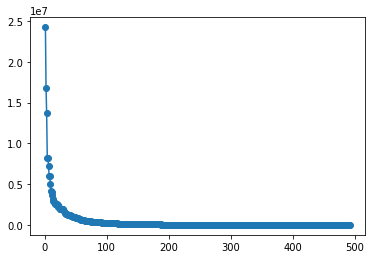

In [74]:
plt.plot(ids, labelcounts['event_id'], marker = 'o')

In [78]:
labelcounts['event_id'].sum() *.8

167484568.0

In [ ]:
df.merge(label_categories_with_counts, on="label_id").to_csv("merged.csv")